# CSCI4022 Homework 1; Review

## Due Monday, February 1 at 11:59 pm to Canvas

#### Submit this file as a .ipynb with *all cells compiled and run* to the associated dropbox.

***

Your solutions to computational questions should include any specified Python code and results as well as written commentary on your conclusions.  Remember that you are encouraged to discuss the problems with your classmates, but **you must write all code and solutions on your own**.

**NOTES**: 

- Any relevant data sets should be available on Canvas. To make life easier on the graders if they need to run your code, do not change the relative path names here. Instead, move the files around on your computer.
- If you're not familiar with typesetting math directly into Markdown then by all means, do your work on paper first and then typeset it later.  Here is a [reference guide](https://math.meta.stackexchange.com/questions/5020/mathjax-basic-tutorial-and-quick-reference) linked on Canvas on writing math in Markdown. **All** of your written commentary, justifications and mathematical work should be in Markdown.  I also recommend the [wikibook](https://en.wikibooks.org/wiki/LaTeX) for LaTex.
- Because you can technically evaluate notebook cells is a non-linear order, it's a good idea to do **Kernel $\rightarrow$ Restart & Run All** as a check before submitting your solutions.  That way if we need to run your code you will know that it will work as expected. 
- It is **bad form** to make your reader interpret numerical output from your code.  If a question asks you to compute some value from the data you should show your code output **AND** write a summary of the results in Markdown directly below your code. 
- 45 points of this assignment are in problems.  The remaining 5 are for neatness, style, and overall exposition of both code and text.
- This probably goes without saying, but... For any question that asks you to calculate something, you **must show all work and justify your answers to receive credit**. Sparse or nonexistent work will receive sparse or nonexistent credit. 
- There is *not a prescribed API* for these problems.  You may answer coding questions with whatever syntax or object typing you deem fit.  Your evaluation will primarily live in the clarity of how well you present your final results, so don't skip over any interpretations!  Your code should still be commented and readable to ensure you followed the given course algorithm.

---

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
import seaborn as sns

## Problem 1 (Numerics... kind of; 15 points)

####  a) Solve for $b$ in the matrix-vector product $$\begin{bmatrix}a_1 & a_2 \\ a_3 & a_4\end{bmatrix} \cdot \begin{bmatrix}x_1\\ x_2\end{bmatrix}=b.$$

####  How many computations does this take, if each multiplication and addition is counted as a separate computation?  

 #### What about for

$$\begin{bmatrix}a_1 & a_2 &a_3 \\ a_4 & a_5 &a_6 \\ a_7&a_8&a_9 \end{bmatrix} \cdot \begin{bmatrix}x_1\\ x_2\\x_3\end{bmatrix}=b?$$

Use the following markdown cell to show all work in computing the exact answer.


# Answer

$\begin{bmatrix}a_1 & a_2 \\ a_3 & a_4\end{bmatrix} \cdot \begin{bmatrix}x_1\\ x_2\end{bmatrix}= \begin{bmatrix}a_1 \cdot x_1 + a_2 \cdot x_2 \\ a_3 \cdot x_1 + a_4 \cdot x_2\end{bmatrix} =$ 4 multiplications and 2 additions = $
\boxed{6}$ computations  

$\begin{bmatrix}a_1 & a_2 &a_3 \\ a_4 & a_5 &a_6 \\ a_7&a_8&a_9 \end{bmatrix} \cdot \begin{bmatrix}x_1\\ x_2\\x_3\end{bmatrix}= \begin{bmatrix}a_1 \cdot x_1 + a_2 \cdot x_2 + a_3 \cdot x_3 \\ a_4 \cdot x_1 + a_5 \cdot x_2 + a_6 \cdot x_3 \\ a_7 \cdot x_1 + a_8 \cdot x_2 + a_9 \cdot x_3 \end{bmatrix}$ = 9 multiplications and 6 additions = $\boxed{15}$ computations


####  b) How many computations does matrix-vector computation take if the matrix $A$ is a square $n \times n$ matrix and the vector $x$ is $n \times 1$? 

Visually:

$$\begin{bmatrix} 
    a_{11} & a_{12} & \dots \\
    \vdots & \ddots & \\
    a_{n1} &        & a_{nn} 
    \end{bmatrix}  \cdot \begin{bmatrix}x_1\\ \vdots \\x_n\end{bmatrix}=b$$

Use the following markdown cell to show all work in computing the exact answer.


# Answer

If $A$ is a square $n \times n$ matrix and the vector $x$ is $n \times 1$ matrix then the number of computations needed is: $(n + (n - 1))\cdot n = \boxed{2n^2 - n}$

#### c) How many computations does square matrix-matrix multiplication take if each matrix is $n \times n$? 

For example:

$$\begin{bmatrix} 
    a_{11} & a_{12} & \dots \\
    \vdots & \ddots & \\
    a_{n1} &        & a_{nn} 
    \end{bmatrix} \cdot 
    \begin{bmatrix} 
    b_{11} & b_{12} & \dots \\
    \vdots & \ddots & \\
    b_{n1} &        & b_{nn} 
    \end{bmatrix}=C$$
    
Hint: how many computations for the entry $c_{ij}$ in row $i$, column $j$?

If $n=10^4$, what number is this?

# Answer

$\begin{bmatrix}a_1 & a_2 \\ a_3 & a_4\end{bmatrix} \cdot \begin{bmatrix}x_1 & x_2 \\ x_3 & x_4 \end{bmatrix}= \begin{bmatrix}a_1 \cdot x_1 + a_2 \cdot x_3 & a_1 \cdot x_2 + a_2 \cdot x_4 \\ a_3 \cdot x_1 + a_4 \cdot x_3 & a_3 \cdot x_2 + a_4 \cdot x_4\end{bmatrix}$  
  
  
Therefore, the number of computations required is: $(n + (n - 1))\cdot n^2 = \boxed{2n^3 - n^2}$  
  
For $n=10^4$:  
$(10^4 + (10^4 - 1))\cdot (10^4)^2 = \boxed{1,999,900,000,000}$

## Problem 2 (Distances and Plots; 15 points)

In this problem we will create what's known as a [*variogram*](https://en.wikipedia.org/wiki/Variogram), a plot that describes how much "distance between inputs matters" on a function that inputs locations and outputs some other variable of interest.  Click on the link to see what a variogram often looks like.

Variograms involve similar groupings to histograms, but instead of grouping data points by their actual values, they group *distances* (Euclidean, $L_2$ norm) between data points together on the $x$ axis.

We consider 4 functions.  f1 and f2 below are smooth, well defined trig functions, although one has a shorter period and larger amplitude than the other.  f3 and f4 add random noise - uniform and normal, respectively - to those first functions.

Note also the given code includes a way to plot 3D data (input $x_1$, $x_2$, output $f(x_1,x_2)$) in python as a heat map.

In [2]:
x = np.linspace(0, 1, 20)
y = np.linspace(0, 1, 20)
X, Y = np.meshgrid(x, y)

def f1(x, y):
    return np.sin(7*x+7)+3*np.sin(6*y)
Z1 = f1(X, Y)

def f2(x, y):
    return np.sin(10*x)+np.cos(10*y)
Z2 = f2(X, Y)
np.random.seed(4022)
Z3=Z1+(np.random.rand(20, 20))
Z4=Z2+(np.random.normal(0, 1, size=(20,20)))

Text(0.5, 1.0, 'Function 4: 2 plus normals')

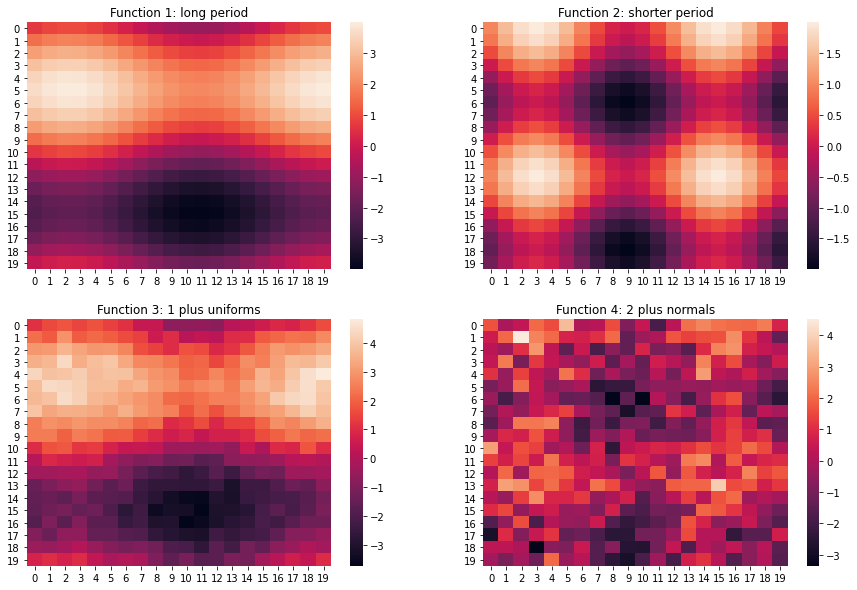

In [3]:
fig, axs = plt.subplots(2, 2,figsize=(15,10))
sns.heatmap(Z1, ax=axs[0,0])
axs[0,0].set_title('Function 1: long period')
sns.heatmap(Z2, ax=axs[0,1])
axs[0,1].set_title('Function 2: shorter period')
sns.heatmap(Z3, ax=axs[1,0])
axs[1,0].set_title('Function 3: 1 plus uniforms')
sns.heatmap(Z4, ax=axs[1,1])
axs[1,1].set_title('Function 4: 2 plus normals')

### Creating your own Variogram

For each of the 4 data sets, perform the following calculations, then create a 2x2 plot corresponding to the figure above where you depict the *variograms* of the 4 data sets.

##### a) Calculate all pairwise distances

Suppose we have a function $f$.  To create a variogram of $f$ given a set of observations,

- Take each and every pair of distinct data values $x=(x_1,x_2)$ and $y=(y_1,y_2)$, and computes the distance between those inputs $d((x_1, x_2), (y_1, y_2))$ and the squared distance between their outputs, $(f(x)-f(y))^2$.  If we had $n$ total data points there are $\binom{n}{2}$ such pairs.

Starting with the given code, you can get this by creating tuples out of the `X` and `Y` arrays.

Note that your distance matrix might be as large as $400\times 400$ for the given problem, although you may only need to fill around half of it due to its symmetry.

NB: You may also choose to create a numpy array of distances instead of a matrix if you prefer!

You should also calculate all pairwise squared deviations $(f(x)-f(y))^2$ in the same or a similar structure to your distance object.

In [4]:
#print(X[0][1])
#print(Y)
def dist_calc(x1,y1,x2,y2):
    return np.sqrt(np.square(x1-x2) + np.square(y1-y2))

def squared_deviation(fx, fy):
    return np.square(fx - fy)

#print(dist_calc(5,5,0,0))

list_of_points = []
list_of_f = []

for i in range(20):
    for j in range(20):
        list_of_points.append((X[i][j], Y[i][j]))
        list_of_f.append((Z1[i][j], Z2[i][j], Z3[i][j], Z4[i][j]))
        
#print(len(list_of_points))

#rows, cols = (400, 400) #2d array based on this implementation: https://www.geeksforgeeks.org/python-using-2d-arrays-lists-the-right-way/
#distances = [[0]*cols]*rows

distances = np.zeros((400,400))
sqr_devs = np.empty((400,400), dtype=object)

for i in range(400):
    for j in range(400):
#         if i == j:
#             distances[i][j] = 0
#         else:
        point1 = list_of_points[i]
        point2 = list_of_points[j]
        
        fx = list_of_f[i]
        fy = list_of_f[j]

        distance = dist_calc(point1[0], point1[1], point2[0], point2[1])
        sqr_dev1 = squared_deviation(fx[0], fy[0])
        sqr_dev2 = squared_deviation(fx[1], fy[1])
        sqr_dev3 = squared_deviation(fx[2], fy[2])
        sqr_dev4 = squared_deviation(fx[3], fy[3])

        distances[i][j] = distance
        sqr_devs[i][j] = (sqr_dev1, sqr_dev2, sqr_dev3, sqr_dev4)
            

            
#print(distances)

#print(sqr_devs)


##### b) bin your data by distance

You should now have two lists/objects/matrices of total entires equal to $\binom{400}{2}$.  One holds distances, the other squared differences of $f$.

- Create "bins" as in a histogram.  Starting at $d=0$ and ending at the maximum observed distance, group each of the $(d(x,y), (f(x)-f(y))^2))$ pair into 20 total bins according to their distance.  So some points will go into the interval from $$[0, \frac{\max_{x,y} d(x,y)}{20}),$$ some into $$[\frac{\max_{x,y} d(x,y)}{20},2 \frac{\max_{x,y} d(x,y)}{20}),$$, and so forth.

In [5]:
max_distance = np.amax(distances)
#print(max_distance)

half_dist = []
half_dev = []
index = 1

for i in range(400):
    for j in range(index, 400):
        half_dist.append(distances[i][j])
        half_dev.append(sqr_devs[i][j])
    index += 1
    
#print(half_dev)
        
#print(len(half_dist))

#binning based on here: https://www.kite.com/python/answers/how-to-put-data-into-bins-using-numpy-in-python#:~:text=Use%20numpy.,element%20in%20the%20original%20array.
bins = np.linspace(0, max_distance, 21)
#print(bins)

bin_indices = np.digitize(half_dist, bins)
#print(bin_indices)

bin_centers = []

for i in range(len(bins) -1):
    bin_centers.append((bins[i] + bins[i+1]) / 2)

#print(bin_centers)

def binning(d, f, i):
    if bin_indices[i] in d:
        d[bin_indices[i]].append((half_dist[i], half_dev[i]))
    else:
        d[bin_indices[i]] = [(half_dist[i], half_dev[i])]
        
sorted_bins = {}
        
for i in range(len(half_dist)):
    binning(sorted_bins, half_dev, i)
    
# for i in range(1, 21):
#     print(len(sorted_bins[i]))

##### c) Create local averages

For each of the (hundreds!) of points within each bin, take the mean value of the $(f(x)-f(y))^2))$ deviations in that bin.

You should have a list of 20 average values.


In [6]:
averages_1 = np.zeros((20))
averages_2 = np.zeros((20))
averages_3 = np.zeros((20))
averages_4 = np.zeros((20))

#print(sorted_bins[20][1][1][0])

for i in range(20):
    avg = 0
    for j in range(len(sorted_bins[i + 1])):
        avg += sorted_bins[i+1][j][1][0]
        
    avg = avg / len(sorted_bins[i + 1])
    averages_1[i] = avg
    
for i in range(20):
    avg = 0
    for j in range(len(sorted_bins[i + 1])):
        avg += sorted_bins[i+1][j][1][1]
        
    avg = avg / len(sorted_bins[i + 1])
    averages_2[i] = avg
    
for i in range(20):
    avg = 0
    for j in range(len(sorted_bins[i + 1])):
        avg += sorted_bins[i+1][j][1][2]
        
    avg = avg / len(sorted_bins[i + 1])
    averages_3[i] = avg
    
for i in range(20):
    avg = 0
    for j in range(len(sorted_bins[i + 1])):
        avg += sorted_bins[i+1][j][1][3]
        
    avg = avg / len(sorted_bins[i + 1])
    averages_4[i] = avg

##### d) Create variograms

A variogram is a line plot with the center of each bin (the bins in part b) on the $x$-axis and the average squared deviation of points within that bin (found in part c) on the $y$-axis.

In the same 2x2 structure as the given code at the start of the problem, plot the 4 variograms for $F1, F2, F3,$ and $F4).


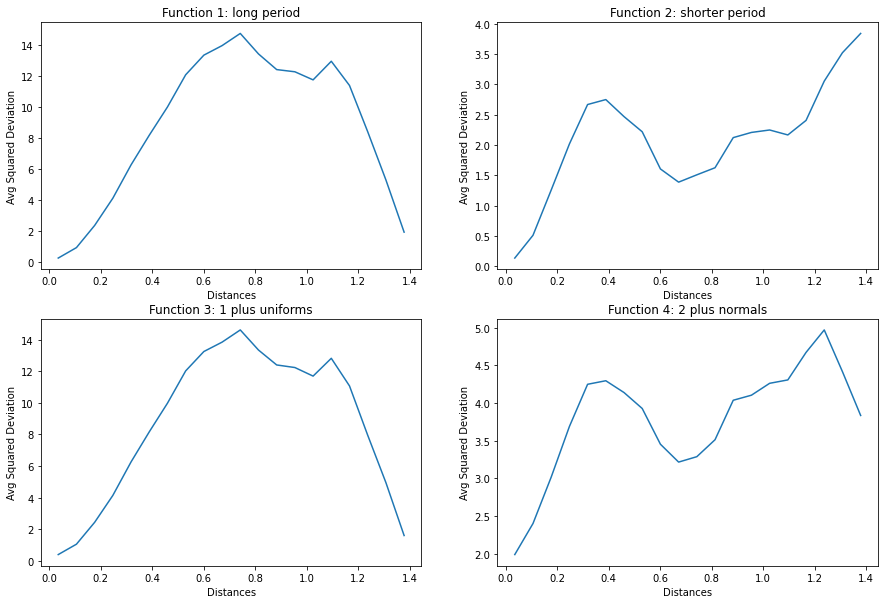

In [7]:
fig, axs = plt.subplots(2, 2,figsize=(15,10))

axs[0,0].set_title('Function 1: long period')
axs[0,0].set_xlabel('Distances')
axs[0,0].set_ylabel('Avg Squared Deviation')
axs[0,0].plot(bin_centers, averages_1)

axs[0,1].set_title('Function 2: shorter period')
axs[0,1].set_xlabel('Distances')
axs[0,1].set_ylabel('Avg Squared Deviation')
axs[0,1].plot(bin_centers, averages_2)

axs[1,0].set_title('Function 3: 1 plus uniforms')
axs[1,0].set_xlabel('Distances')
axs[1,0].set_ylabel('Avg Squared Deviation')
axs[1,0].plot(bin_centers, averages_3)

axs[1,1].set_title('Function 4: 2 plus normals')
axs[1,1].set_xlabel('Distances')
axs[1,1].set_ylabel('Avg Squared Deviation')
axs[1,1].plot(bin_centers, averages_4)

##### e) Interpret the variograms.  What do different values or features on the variograms appear to correspond to in terms of the shapes of the functions and added randomness of the 4 data sets?


For function 3 the 'randomness' added is uniformly adding 20 to each value so therefore the deviations will not vary from those in function 1.  
For function 4 The 'randomness' added is normally distributed from 0 to 1 which will increase the deviations from function 2 as shown above. 
When we have a longer period the max average squared deviation between points is greater.

## Problem 3 (Hypothesis Simulation; 15 points)


One question we will often be tasked with in the semester is asking what "random" looks like.  In hypothesis testing, we typically ask "what is the probability of observing *this* test statistic if everything is fair/random."  We can then do so for a variety of test statistics (`Z`, `T`, proportions, sample variances, etc.) to draw conclusions like "That doesn't look random!  It's extremely unlikely to happen under the **null hypothesis**, so we reject that hypothesis."

As we develop new tools this semester, simulation can help us determine what our tools do if everything is random, which helps provide context to the answers we get on real data - which ideally includes a real signal in it that we want to discover.

### How correlated is really correlated?

The code below simulates from the bivariate normal distribution, which we'll use later this semester.  In brief, it simulates a list of points (called `rnorms` below) as an $j \times 2$ array where each of the `j` rows is an $(x,y)$ point.  We can either simulate these two column vectors $X$ and $Y$ so they're actually independent and the true correlation coefficient $\rho_{xy}=0$ OR we can simulate them with actual correlations included.

We want to know how much correlation is required for us to be able to meaningfully detect it.  Note that our simulated "*sample*" correlation coefficients never actually match the true value!

Example code:

Blue correlation coefficient: [[1.        0.0520708]
 [0.0520708 1.       ]]
Red correlation coefficient: [[1.         0.79221903]
 [0.79221903 1.        ]]


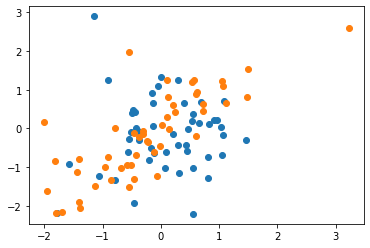

In [8]:
rho=0
rnorms=np.random.multivariate_normal([0,0], [[1,rho],[rho,1]],50)  #sample of size j=50 indepenent N(0,1)
print('Blue correlation coefficient:', np.corrcoef(rnorms[:,0],y=rnorms[:,1]))
plt.scatter(rnorms[:,0],y=rnorms[:,1]) #sanity check... do they look uncorrelated?


rho=.8
rnorms=np.random.multivariate_normal([0,0], [[1,rho],[rho,1]],50)  #sample of size j=50 rho=.8 N(0,1)
print('Red correlation coefficient:', np.corrcoef(rnorms[:,0],y=rnorms[:,1]))
plt.scatter(rnorms[:,0],y=rnorms[:,1]) #sanity check... do they look correlated?


##### a) Our goal is to understand at what point we can actually tell whether or not things are correlated. To this end, let the example code above guide you to code that allows you to:

 - i) Generate a sample of `j=10` bivariate normals (of mean 0, variance 1) that are uncorrelated.  Calculate the correlation of this sample.
 - ii) Repeat step `i` 1000 times.  Save all 1000 correlation coefficients.
 - iii) Repeat steps `i` and `ii` for `j=100` and `j=1000`.  We now have 3000 correlation coefficients across 3 values of `j`.
 



In [9]:
#i
rho=0
rnorms_10=np.random.multivariate_normal([0,0], [[1,rho],[rho,1]],10) #j = 10

#print('Correlation coefficient:', np.corrcoef(rnorms_10[:,0],y=rnorms_10[:,1]))

#plt.scatter(rnorms[:,0],y=rnorms[:,1]) #sanity check... do they look uncorrelated?

#ii
cor_coef_10 = np.zeros(1000)

for i in range(1000):
    rnorms_10=np.random.multivariate_normal([0,0], [[1,rho],[rho,1]],10) #j = 10 --These coding sections are heavily based on the example code above
    coef_10 = np.corrcoef(rnorms_10[:,0],y=rnorms_10[:,1])
    #cor_coef_10.append(coef_10[0][1])
    cor_coef_10[i] = coef_10[0][1]
    
#iii
cor_coef_100 = np.zeros(1000)
cor_coef_1000 = np.zeros(1000)

for i in range(1000):
    rnorms_100=np.random.multivariate_normal([0,0], [[1,rho],[rho,1]],100) #j = 100 --These coding sections are heavily based on the example code above
    coef_100 = np.corrcoef(rnorms_100[:,0],y=rnorms_100[:,1])
    #cor_coef_100.append(coef_100[0][1])
    cor_coef_100[i] = coef_100[0][1]
    
    rnorms_1000=np.random.multivariate_normal([0,0], [[1,rho],[rho,1]],1000) #j = 1000 --These coding sections are heavily based on the example code above
    coef_1000 = np.corrcoef(rnorms_1000[:,0],y=rnorms_1000[:,1])
    #cor_coef_1000.append(coef_1000[0][1])
    cor_coef_1000[i] = coef_1000[0][1]
    
#print(cor_coef_10)

Consider testing the null hypothesis:
  - $H_0:$ These samples are uncorrelated
  
  against the alternative
  
  - $H_a:$ These samples have $\rho_{xy} \ne 0$.
  
#### b) At what sample correlations do we reject the null hypothesis if we set a probability of Type I error equal to .05?

This defines the *rejection region* for a statistical test of whether correlation is nonzero!

In [14]:
cor_coef_10 = np.sort(cor_coef_10)
cor_coef_100 = np.sort(cor_coef_100)
cor_coef_1000 = np.sort(cor_coef_1000)

# all_cor_coef = np.empty(0)
# all_cor_coef = np.append(all_cor_coef, [cor_coef_10, cor_coef_100, cor_coef_1000])
# all_cor_ceof = all_cor_coef.sort()

#print(all_cor_coef)

#for i in range(75):
    #print(all_cor_coef[i])
    
#for i in range(75):
    #print(all_cor_coef[2924 + i])
    
lower_max_10 = cor_coef_10[24]
print("Lower rejection region for j=10: ",lower_max_10)
upper_min_10 = cor_coef_10[-24]
print("Upper rejection region for j=10: ",upper_min_10)

lower_max_100 = cor_coef_100[24]
print("Lower rejection region for j=100: ",lower_max_100)
upper_min_100 = cor_coef_100[-24]
print("Upper rejection region for j=100: ",upper_min_100)

lower_max_1000 = cor_coef_1000[24]
print("Lower rejection region for j=1000: ",lower_max_1000)
upper_min_1000 = cor_coef_1000[-24]
print("Upper rejection region for j=1000: ",upper_min_1000)

Lower rejection region for j=10:  -0.6641630360190622
Upper rejection region for j=10:  0.6672233155716717
Lower rejection region for j=100:  -0.19725740283080578
Upper rejection region for j=100:  0.19392703052983087
Lower rejection region for j=1000:  -0.06296897706928203
Upper rejection region for j=1000:  0.06395377233322509


For $j=10$ we reject the null hypothesis for sample correlations that are below -0.6641630360190622 or above 0.6672233155716717  
For $j=100$ we reject the null hypothesis for sample correlations that are below -0.19725740283080578 or above 0.19392703052983087  
For $j=1000$ we reject the null hypothesis for sample correlations that are below -0.06296897706928203 or above 0.06395377233322509  

#### c) Use additional simulations as in part a) to determine the power of our test in b) when `j=10`, `j=100`, and `j=1000` if the true correlation coefficient is $\rho=.1$.

Recall: power is defined as the probability of rejecting the null hypothesis - or being in the rejection region from part b) - when the true correlation was nonzero.  

In [19]:
rho=.1

cor_coef_c_10 = np.zeros(1000)
cor_coef_c_100 = np.zeros(1000)
cor_coef_c_1000 = np.zeros(1000)


for i in range(1000):
    rnorms_c_10=np.random.multivariate_normal([0,0], [[1,rho],[rho,1]],10) #j = 10 --These coding sections are heavily based on the example code above
    coef_c_10 = np.corrcoef(rnorms_c_10[:,0],y=rnorms_c_10[:,1])
    #cor_coef_10.append(coef_10[0][1])
    cor_coef_c_10[i] = coef_c_10[0][1]
    
    rnorms_c_100=np.random.multivariate_normal([0,0], [[1,rho],[rho,1]],100) #j = 100 --These coding sections are heavily based on the example code above
    coef_c_100 = np.corrcoef(rnorms_c_100[:,0],y=rnorms_c_100[:,1])
    #cor_coef_100.append(coef_100[0][1])
    cor_coef_c_100[i] = coef_c_100[0][1]
    
    rnorms_c_1000=np.random.multivariate_normal([0,0], [[1,rho],[rho,1]],1000) #j = 1000 --These coding sections are heavily based on the example code above
    coef_c_1000 = np.corrcoef(rnorms_c_1000[:,0],y=rnorms_c_1000[:,1])
    #cor_coef_1000.append(coef_1000[0][1])
    cor_coef_c_1000[i] = coef_c_1000[0][1]
    
    
power_c_10 = 0
power_c_100 = 0
power_c_1000 = 0

for i in range(1000):
    if cor_coef_c_10[i] < lower_max_10 or upper_min_10 < cor_coef_c_10[i]:
        power_c_10 += 1
        
    if cor_coef_c_100[i] < lower_max_100 or upper_min_100 < cor_coef_c_100[i]:
        power_c_100 += 1
        
    if cor_coef_c_1000[i] < lower_max_1000 or upper_min_1000 < cor_coef_c_1000[i]:
        power_c_1000 += 1
        
#print(power_c)

print("Power for j=10: ", power_c_10/1000)
print("Power for j=100: ", power_c_100/1000)
print("Power for j=1000: ", power_c_1000/1000)

Power for j=10:  0.039
Power for j=100:  0.174
Power for j=1000:  0.86


The power of our test from b) for $j=10$ is 0.039 if the true correlation coefficient is $\rho=.1$  
The power of our test from b) for $j=100$ is 0.174 if the true correlation coefficient is $\rho=.1$  
The power of our test from b) for $j=1000$ is 0.86 if the true correlation coefficient is $\rho=.1$  

#### d) Use additional simulations as in part a) to determine the power of our test in b) when `j=10`, `j=100`, and `j=1000` if the true correlation coefficient is $\rho=-.1$.  Should this differ from part c)?

In [25]:
rho= -.1

cor_coef_d_10 = np.zeros(1000)
cor_coef_d_100 = np.zeros(1000)
cor_coef_d_1000 = np.zeros(1000)


for i in range(1000):
    rnorms_d_10=np.random.multivariate_normal([0,0], [[1,rho],[rho,1]],10) #j = 10 --These coding sections are heavily based on the example code above
    coef_d_10 = np.corrcoef(rnorms_d_10[:,0],y=rnorms_d_10[:,1])
    #cor_coef_10.append(coef_10[0][1])
    cor_coef_d_10[i] = coef_d_10[0][1]
    
    rnorms_d_100=np.random.multivariate_normal([0,0], [[1,rho],[rho,1]],100) #j = 100 --These coding sections are heavily based on the example code above
    coef_d_100 = np.corrcoef(rnorms_d_100[:,0],y=rnorms_d_100[:,1])
    #cor_coef_100.append(coef_100[0][1])
    cor_coef_d_100[i] = coef_d_100[0][1]
    
    rnorms_d_1000=np.random.multivariate_normal([0,0], [[1,rho],[rho,1]],1000) #j = 1000 --These coding sections are heavily based on the example code above
    coef_d_1000 = np.corrcoef(rnorms_d_1000[:,0],y=rnorms_d_1000[:,1])
    #cor_coef_1000.append(coef_1000[0][1])
    cor_coef_d_1000[i] = coef_d_1000[0][1]
    
    
power_d_10 = 0
power_d_100 = 0
power_d_1000 = 0

for i in range(1000):
    if cor_coef_d_10[i] < lower_max_10 or upper_min_10 < cor_coef_d_10[i]:
        power_d_10 += 1
        
    if cor_coef_d_100[i] < lower_max_100 or upper_min_100 < cor_coef_d_100[i]:
        power_d_100 += 1
        
    if cor_coef_d_1000[i] < lower_max_1000 or upper_min_1000 < cor_coef_d_1000[i]:
        power_d_1000 += 1
        
#print(power_d)

print("Power for j=10: ", power_d_10/1000)
print("Power for j=100: ", power_d_100/1000)
print("Power for j=1000: ", power_d_1000/1000)

Power for j=10:  0.041
Power for j=100:  0.183
Power for j=1000:  0.866


The power of our test from b) for $j=10$ is 0.041 if the true correlation coefficient is $\rho=.1$  
The power of our test from b) for $j=100$ is 0.183 if the true correlation coefficient is $\rho=.1$  
The power of our test from b) for $j=1000$ is 0.866 if the true correlation coefficient is $\rho=.1$  

The powers' between c) and d) should not differ other than slight differences due to simulation because you have altered the true correlation by the same amount just in different directions so the powers will end up the same due to the rejecton regions being relatively symmetric.